In this notebook, we want to look at tests that help us see if a particular column is normally distributed. If a column normally distributed, only then we can use standard scaler. Otherwise we use Min-Max scaler. 


Min-Max 

10, 20, 30, 45

min = 10

max = 45

max - min = 45-10 = 35

(10-10)/35 = 0

(20-10)/35 = 10/35

(30-10)/35 = 20/35

(45-10)/35 = 35/35 = 1

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Columns Details
age: person's age

gender (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

In [4]:
df.columns


Index(['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.shape

(303, 14)

## Goal 

We want to determine whether features: age and chol are normally distributed. 
Before we consider the tests, let's plot the histograms of age and chol. 

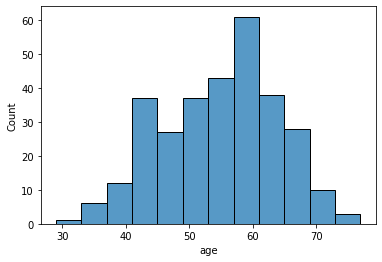

In [7]:
sns.histplot(data=df["age"])

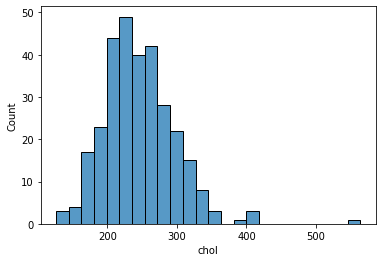

In [8]:
sns.histplot(data=df["chol"])

### Shapiro-Wilk Test

The Shapiro–Wilk test is a test of normality in frequentist statistics. 
It was published in 1965 by Samuel Sanford Shapiro and Martin Wilk.


Scipy stats provides shapiro() 

scipy.stats.shapiro(x)

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

The shapiro() function retruns:

test statistic (float)  

p-value for the hypothesis test.

References: https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test
        
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html


In [9]:
from scipy import stats

In [10]:
shapiro_age = stats.shapiro(df["age"]) 

shapiro_chol = stats.shapiro(df["chol"]) 

In [11]:
print(shapiro_age) # the second value is known as the p-value

print(shapiro_chol)

(0.9863710999488831, 0.005800189916044474)
(0.9468814134597778, 5.364669153351542e-09)


#### Conclusion from Shario-Wilk for age and chol

The p-value for age is 0.0058 which is less than .05 so we can reject the null hypothesis. The feature age is not normally distributed.


The p-value for chol is 5.3* 10^(-9) is so small, we can assume that the feature chol is not normally distributed. 

### D’Agostino’s $K^2$ Test

The D’Agostino’s $K^2$ test calculates summary statistics from the data, namely kurtosis and skewness, to determine if the data distribution departs from the normal distribution, named for Ralph D’Agostino.

Skew is a quantification of how much a distribution is pushed left or right, a measure of asymmetry in the distribution.
Kurtosis quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality.

The D’Agostino’s $K^2$ test is available via the normaltest() SciPy function and returns the test statistic and the p-value.

scipy.stats.normaltest(a) 

This function tests the null hypothesis that a sample comes from a normal distribution.

The normaltest() function Returns: 

statistic (float or array) - s^2 + k^2, where s is the z-score returned by skewtest and k is the z-score returned by kurtosistest.

p-value (float or array) - A 2-sided chi squared probability for the hypothesis test.


Reference: https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

In [12]:
# normality test
from scipy.stats import normaltest

stat, p = normaltest(df["age"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks normal (fail to reject H0)')
else:
    print('Sample does not look normal (reject H0)')

Statistics=8.748, p=0.013
Sample does not look normal (reject H0)


In [13]:
stat, p = normaltest(df["chol"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks normal (fail to reject H0)')
else:
    print('Sample does not look normal (reject H0)')

Statistics=83.504, p=0.000
Sample does not look normal (reject H0)


## Which Test to Use?

### Hard Fail: 

Even if one of the test fails, then we assume that the data is not normally distributed.

### Soft Fail:

Even if one test returns that the data is normal, then we can assume that the data is normally distributed.

